In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/FYP_Phase2/OoiWeiXiang_1181202928/dataset.csv', header=None, names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson'])

In [ ]:
df.head(20)

,ratioR,ratioL,cadence,mean_speed,turning_duration,turning_steps,parkinson
0,0.635779,0.583575,68,0.022442,4.533333,7.0,1
1,0.468186,0.482622,72,0.011391,5.500000,8.0,1
2,1.311237,1.380644,79,0.117721,1.666667,4.0,0
3,1.959382,1.793353,80,0.249075,1.200000,2.0,0
4,1.561225,1.283231,100,0.183120,1.266667,3.0,0
5,1.731128,1.713930,93,0.267751,1.100000,2.0,0
6,1.398331,1.342714,86,0.164463,1.366667,3.0,0
7,1.478034,1.442988,99,0.200070,1.633333,3.0,0
8,1.980675,1.696162,91,0.252993,1.233333,2.0,0
9,1.472817,1.400599,90,0.178843,1.566667,2.0,0


In [ ]:
# Fill None with median based on the label in column A

df = df.fillna(df.median())

In [ ]:
df.groupby('parkinson').describe().loc[:,(slice(None),['count','mean', 'std'])]

ratioR                     ratioL                     cadence  \
           count      mean       std  count      mean       std   count   
parkinson                                                                 
0          186.0  0.544402  0.592681  186.0  0.523628  0.550917   186.0   
1          144.0  0.206211  0.223838  144.0  0.205949  0.223300   144.0   

                                mean_speed                      \
                mean        std      count      mean       std   
parkinson                                                        
0          84.715054  10.908935      186.0  0.064571  0.078640   
1          84.770833   5.741176      144.0  0.015157  0.026922   

          turning_duration                     turning_steps            \
                     count      mean       std         count      mean   
parkinson                                                                
0                    186.0  2.411559  0.598820         186.0  3.731183   
1                    144.0  4.394329  4.567394         144.0  6.625000   

                     
                std  
parkinson            
0          0.800537  
1          6.521481

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
df.groupby('parkinson').describe()

ratioR                                                              \
           count      mean       std       min       25%       50%       75%   
parkinson                                                                      
0          186.0  0.544402  0.592681  0.029869  0.131950  0.251218  0.806562   
1          144.0  0.206211  0.223838  0.020069  0.080527  0.140958  0.229154   

                    ratioL                                                    \
                max  count      mean       std       min       25%       50%   
parkinson                                                                      
0          2.423433  186.0  0.523628  0.550917  0.029869  0.131950  0.251218   
1          1.488382  144.0  0.205949  0.223300  0.020069  0.080527  0.140958   

                              cadence                                          \
                75%       max   count       mean        std   min   25%   50%   
parkinson                                                                       
0          0.806562  2.108294   186.0  84.715054  10.908935  54.0  78.0  83.0   
1          0.229154  1.488382   144.0  84.770833   5.741176  68.0  81.0  85.0   

                       mean_speed                                          \
            75%    max      count      mean       std       min       25%   
parkinson                                                                   
0          91.0  124.0      186.0  0.064571  0.078640  0.000861  0.014026   
1          89.0   96.0      144.0  0.015157  0.026922  0.000592  0.003174   

                                        turning_duration                      \
                50%       75%       max            count      mean       std   
parkinson                                                                      
0          0.028770  0.078199  0.361574            186.0  2.411559  0.598820   
1          0.006359  0.016315  0.201815            144.0  4.394329  4.567394   

                                                             turning_steps  \
                min       25%       50%       75%        max         count   
parkinson                                                                    
0          0.733333  2.666667  2.666667  2.666667   5.600000         186.0   
1          1.500000  2.666667  2.666667  4.177083  31.583333         144.0   

                                                         
               mean       std  min  25%  50%  75%   max  
parkinson                                                
0          3.731183  0.800537  2.0  4.0  4.0  4.0   9.0  
1          6.625000  6.521481  2.0  4.0  4.0  7.0  43.0

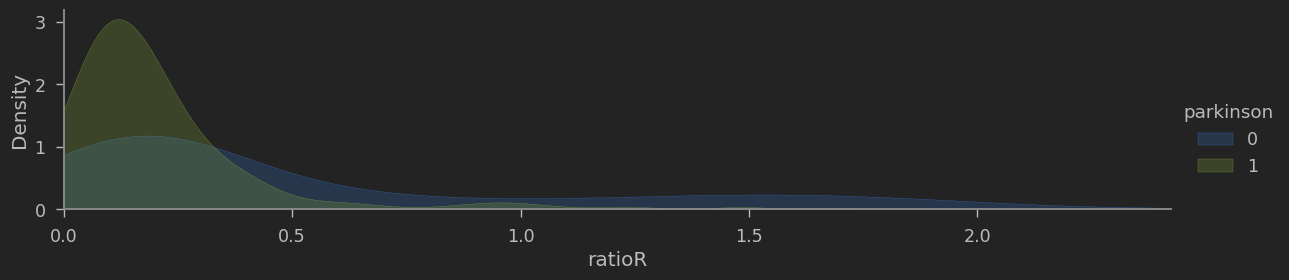

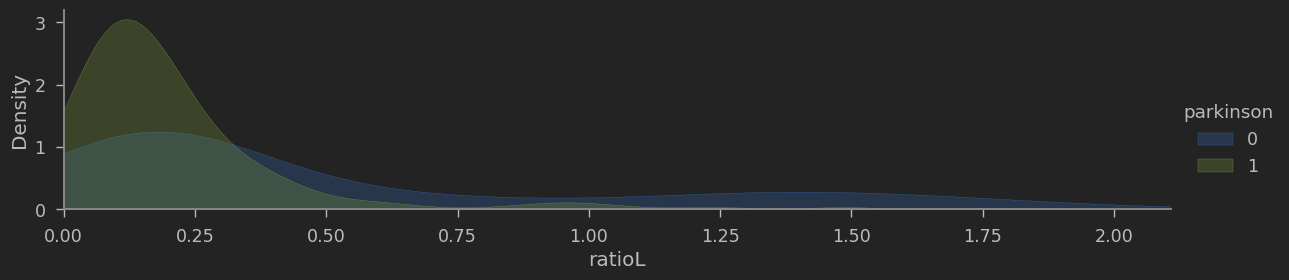

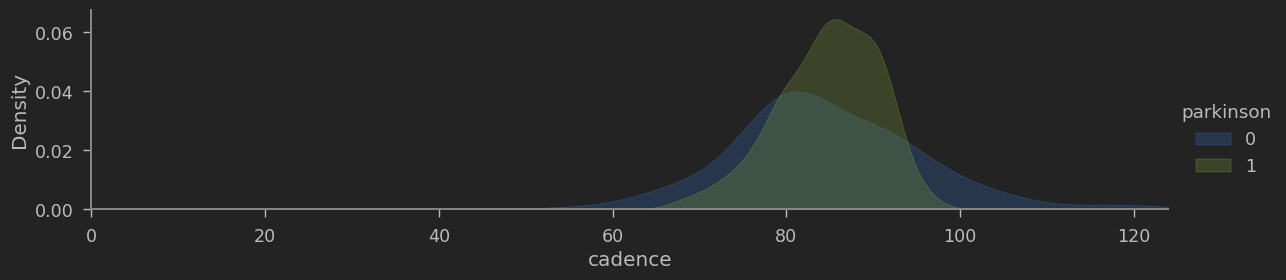

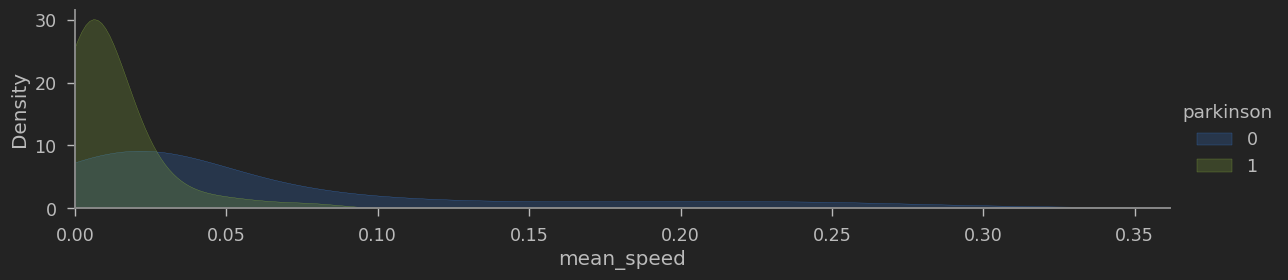

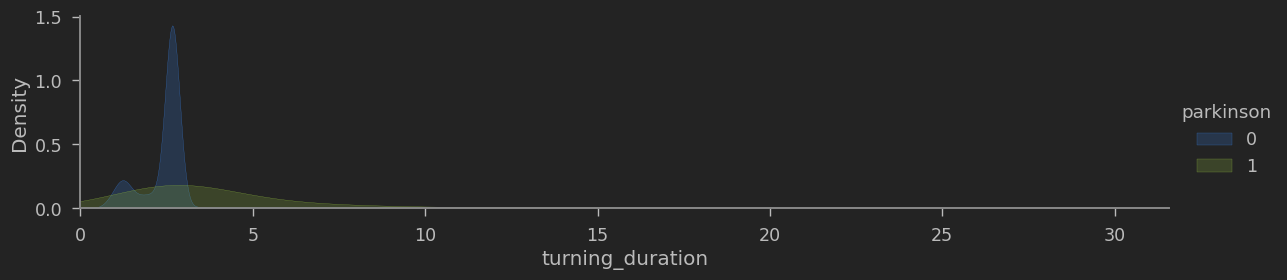

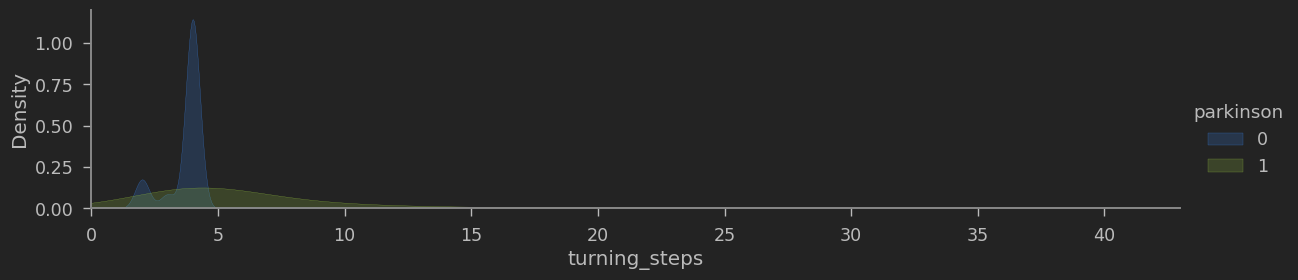

In [ ]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
plot_distribution(df, var='ratioR', target='parkinson')
plot_distribution(df, var='ratioL', target='parkinson')
plot_distribution(df, var='cadence', target='parkinson')
plot_distribution(df, var='mean_speed', target='parkinson')
plot_distribution(df, var='turning_duration', target='parkinson')
plot_distribution(df, var='turning_steps', target='parkinson')

In [ ]:
algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

In [ ]:
X = df.drop(['parkinson'],axis=1)
y = df['parkinson']

In [ ]:
from sklearn.model_selection import GridSearchCV
def tts(X, y, test_size=0.2, random_state=42, shuffle=False):
  # Split the training and testing dataset
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)

  print("The test size is: ", test_size, ", ", random_state, ", ", shuffle)
  print("X train shape: ", X_train.shape, "X test shape: ", X_test.shape)
  print("y train shape: ", y_train.shape, "y test shape: ", y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
def pca(X_train, X_test):
  # PCA
  from sklearn.decomposition import PCA

  pca = PCA(n_components=len(X_train.columns), svd_solver='randomized', whiten=True).fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  print("PCA...")
  return X_train_pca, X_test_pca

In [ ]:
def scaler(X_train, X_test):
  # Feature scaling
  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler().fit(X_train)
  X_train_scaler = scaler.transform(X_train)
  X_test_scaler = scaler.transform(X_test)

  print("Scaler...")
  return X_train_scaler, X_test_scaler

In [ ]:
def knn(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler):
  # Import and find the best algorithm parameters for KNN
  from sklearn.neighbors import KNeighborsClassifier

  print("knn...")

  knn = KNeighborsClassifier()

  params = {
      'n_neighbors': [1,2,5,10,25,30,50,100,250],
      'leaf_size': [1,2,5,10,25,50]
  }

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator=knn,
                            param_grid=params,
                            cv = 4,
                            n_jobs=-1, verbose=1, scoring="accuracy")

  grid_search.fit(X_train, y_train)
  print("best score X Train: ", grid_search.best_score_)

  knn_best = grid_search.best_estimator_
  print("knn_best_X_Train: ", knn_best)

  best_score = grid_search.best_score_
  best_train_name = "X_train"
  best_train = X_train
  best_train_test = X_test
  best_estimator = grid_search.best_estimator_

  grid_search.fit(X_train_pca, y_train)
  print("best score X Train pca: ", grid_search.best_score_)

  knn_best = grid_search.best_estimator_
  print("knn_best_X_Train_pca: ", knn_best)

  if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_train_name = "X_train_pca"
    best_train = X_train_pca
    best_train_test = X_test_pca
    best_estimator = grid_search.best_estimator_

  grid_search.fit(X_train_scaler, y_train)
  print("best score X Train scaler: ", grid_search.best_score_)

  knn_best = grid_search.best_estimator_
  print("knn_best_X_Train_scaler: ", knn_best)

  if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_train_name = "X_train_scaler"
    best_train = X_train_scaler
    best_train_test = X_test_scaler
    best_estimator = grid_search.best_estimator_

  print("all_best: ", best_estimator, ", ", best_score, "\n")
  algos.append('knn_')
  best_train_names.append(best_train_name)
  best_trains.append(best_train)
  best_train_tests.append(best_train_test)
  best_estimators.append(best_estimator)

In [ ]:
def rf(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler):
  # Random Forest
  from sklearn.ensemble import RandomForestClassifier

  print("rf...")

  rf = RandomForestClassifier()

  params = {
      'max_depth': [10,20,50],
      'min_samples_leaf': [5,10,20],
      'n_estimators': [10,20,30,50,100,200],
      'random_state': [10,20,50]
  }

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator=rf,
                            param_grid=params,
                            cv = 4,
                            n_jobs=-1, verbose=1, scoring="accuracy")

  grid_search.fit(X_train, y_train)
  print("best score X Train: ", grid_search.best_score_)

  rf_best = grid_search.best_estimator_
  print("rf_best_X_Train: ", rf_best)

  best_score = grid_search.best_score_
  best_train_name = "X_train"
  best_train = X_train
  best_train_test = X_test
  best_estimator = grid_search.best_estimator_

  grid_search.fit(X_train_pca, y_train)
  print("best score X Train pca: ", grid_search.best_score_)

  rf_best = grid_search.best_estimator_
  print("rf_best_X_Train_pca: ", rf_best)

  if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_train_name = "X_train_pca"
    best_train = X_train_pca
    best_train_test = X_test_pca
    best_estimator = grid_search.best_estimator_

  grid_search.fit(X_train_scaler, y_train)
  print("best score X Train scaler: ", grid_search.best_score_)

  rf_best = grid_search.best_estimator_
  print("rf_best_X_Train_scaler: ", rf_best)

  if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_train_name = "X_train_scaler"
    best_train = X_train_scaler
    best_train_test = X_test_scaler
    best_estimator = grid_search.best_estimator_

  print("all_best: ", best_estimator, ", ", best_score, "\n")
  algos.append('rf_')
  best_train_names.append(best_train_name)
  best_trains.append(best_train)
  best_train_tests.append(best_train_test)
  best_estimators.append(best_estimator)

In [ ]:
def mlp(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler):
  # Multi-layer Perceptron
  from sklearn.neural_network import MLPClassifier

  print("mlp...")

  mlp = MLPClassifier(random_state=42)

  params = {
      'max_iter': [100, 500, 1000],
      'hidden_layer_sizes': [(100,200),(100,500),(200,500)]
  }

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator=mlp,
                            param_grid=params,
                            cv = 4,
                            n_jobs=-1, verbose=1, scoring="accuracy")

  grid_search.fit(X_train, y_train)
  print("best score X Train: ", grid_search.best_score_)

  mlp_best = grid_search.best_estimator_
  print("mlp_best_X_Train: ", mlp_best)

  best_score = grid_search.best_score_
  best_train_name = "X_train"
  best_train = X_train
  best_train_test = X_test
  best_estimator = grid_search.best_estimator_

  grid_search.fit(X_train_pca, y_train)
  print("best score X Train pca: ", grid_search.best_score_)

  mlp_best = grid_search.best_estimator_
  print("mlp_best_X_Train_pca: ", mlp_best)

  if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_train_name = "X_train_pca"
    best_train = X_train_pca
    best_train_test = X_test_pca
    best_estimator = grid_search.best_estimator_

  grid_search.fit(X_train_scaler, y_train)
  print("best score X Train scaler: ", grid_search.best_score_)

  mlp_best = grid_search.best_estimator_
  print("mlp_best_X_Train_scaler: ", mlp_best)

  if grid_search.best_score_ > best_score:
    best_score = grid_search.best_score_
    best_train_name = "X_train_scaler"
    best_train = X_train_scaler
    best_train_test = X_test_scaler
    best_estimator = grid_search.best_estimator_

  print("all_best: ", best_estimator, ", ", best_score, "\n")
  algos.append('mlp_')
  best_train_names.append(best_train_name)
  best_trains.append(best_train)
  best_train_tests.append(best_train_test)
  best_estimators.append(best_estimator)

In [ ]:
def train(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler):

  knn(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler)
  rf(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler)
  mlp(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler)

In [ ]:
def run(X, y):

  X_train, X_test, y_train, y_test = tts(X, y, test_size=0.21, random_state=48, shuffle=True)
  X_train_pca, X_test_pca = pca(X_train, X_test)
  X_train_scaler, X_test_scaler = scaler(X_train, X_test)

  train(X_train, X_train_pca, X_train_scaler, y_train, X_test, X_test_pca, X_test_scaler)

  return y_train, y_test;

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def show_result(y_train, y_test):
  print('final result: \n')
  for i in range(0, len(algos)):
    locals()[algos[i].split('_')[0]] = best_estimators[i].fit(best_trains[i], y_train)
    y_pred = best_estimators[i].predict(best_train_tests[i])
    score = accuracy_score(y_test, y_pred)
    print(algos[i].split('_')[0], ': ', best_estimators[i], ", ", best_train_names[i], ", ", score)

    print(classification_report(y_test, y_pred, labels=locals()[algos[i].split('_')[0]].classes_.tolist(), digits=4), "\n")

    plt.figure(figsize=(8, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Blues_r')
    plt.xlabel("Predicted Label: y\'")
    plt.ylabel("Actual Label: y")
    plt.title("{} Accuracy Score: {}".format(algos[i].split('_')[0], score))
    plt.show()
    print("\n\n")

In [ ]:
algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 6) X test shape:  (70, 6)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.7076923076923077
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=2)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.8307692307692307
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.7884615384615384
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.8307692307692307 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.8423076923076924
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       random_state=50)
Fitting 4 folds for each of 162 c

final result: 

knn :  KNeighborsClassifier(leaf_size=1) ,  X_train_pca ,  0.8
              precision    recall  f1-score   support

           0     0.8537    0.8140    0.8333        43
           1     0.7241    0.7778    0.7500        27

    accuracy                         0.8000        70
   macro avg     0.7889    0.7959    0.7917        70
weighted avg     0.8037    0.8000    0.8012        70
 



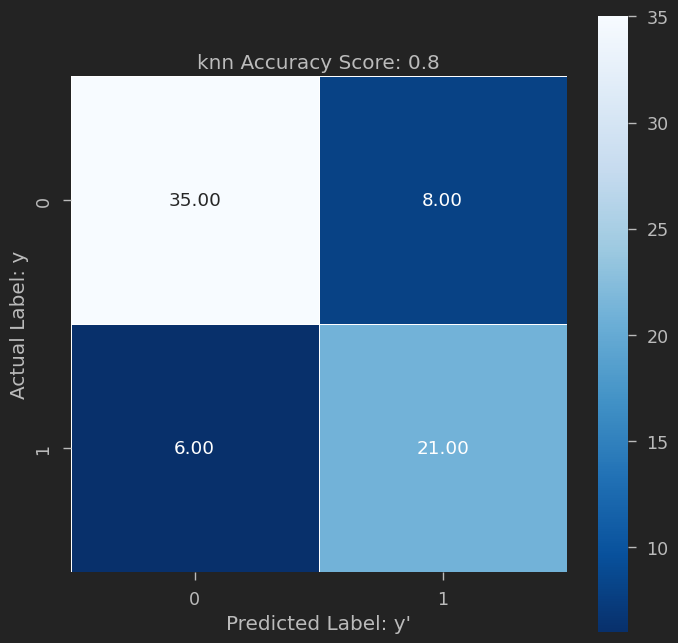




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       random_state=50) ,  X_train ,  0.8285714285714286
              precision    recall  f1-score   support

           0     0.9189    0.7907    0.8500        43
           1     0.7273    0.8889    0.8000        27

    accuracy                         0.8286        70
   macro avg     0.8231    0.8398    0.8250        70
weighted avg     0.8450    0.8286    0.8307        70
 



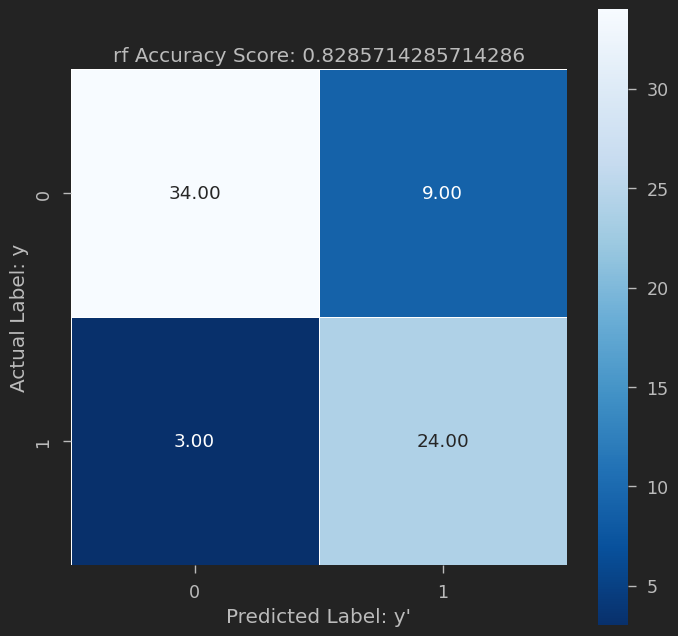




mlp :  MLPClassifier(hidden_layer_sizes=(100, 200), max_iter=100, random_state=42) ,  X_train_pca ,  0.8285714285714286
              precision    recall  f1-score   support

           0     0.9189    0.7907    0.8500        43
           1     0.7273    0.8889    0.8000        27

    accuracy                         0.8286        70
   macro avg     0.8231    0.8398    0.8250        70
weighted avg     0.8450    0.8286    0.8307        70
 



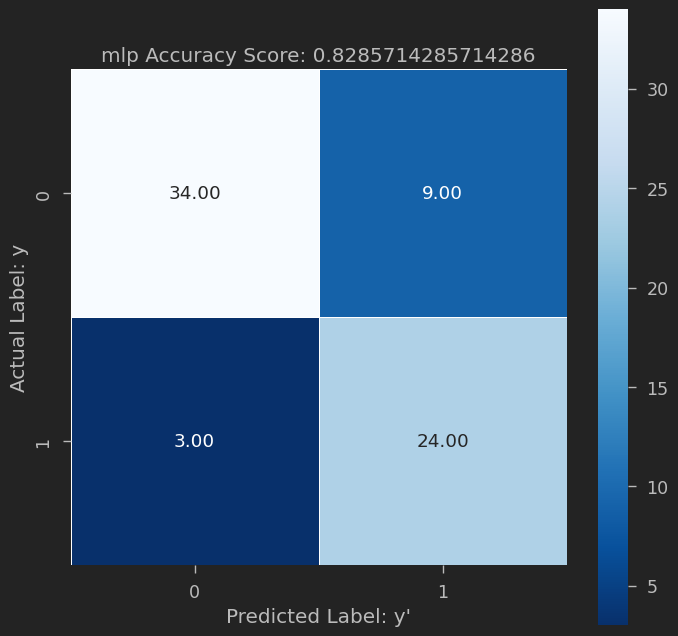

In [ ]:
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 1) X test shape:  (70, 1)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.6576923076923077
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.6576923076923077
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.6576923076923077
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.6576923076923077 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.6653846153846154
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       random_state=10)
Fitting 4 folds for each of 162 candidates, tota

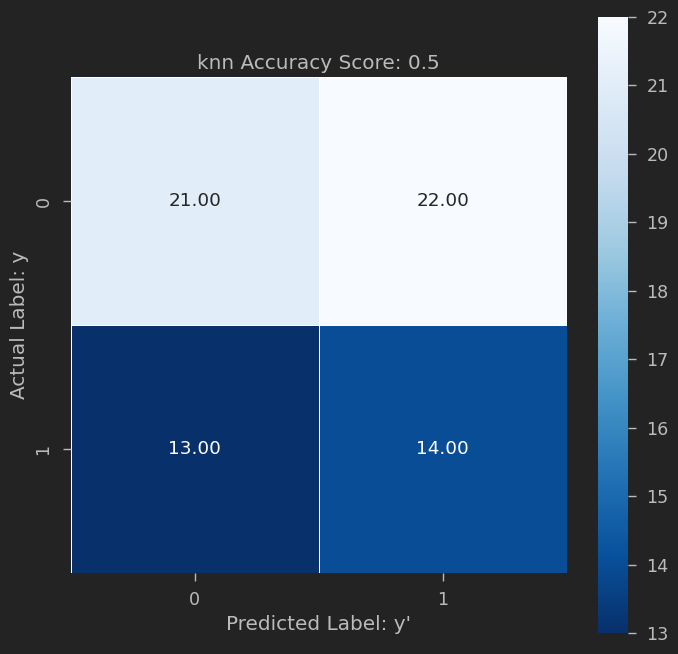




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       random_state=10) ,  X_train ,  0.5571428571428572
              precision    recall  f1-score   support

           0     0.6875    0.5116    0.5867        43
           1     0.4474    0.6296    0.5231        27

    accuracy                         0.5571        70
   macro avg     0.5674    0.5706    0.5549        70
weighted avg     0.5949    0.5571    0.5621        70
 



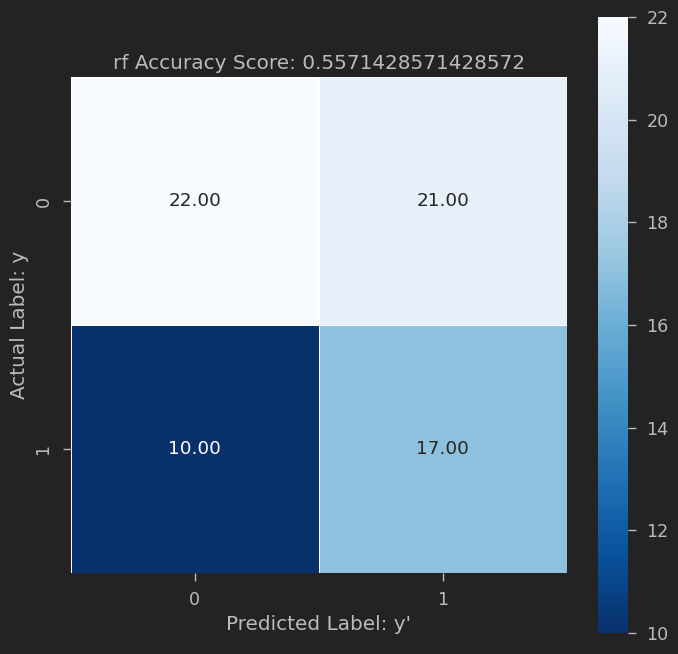




mlp :  MLPClassifier(hidden_layer_sizes=(100, 500), max_iter=100, random_state=42) ,  X_train ,  0.5428571428571428
              precision    recall  f1-score   support

           0     0.6774    0.4884    0.5676        43
           1     0.4359    0.6296    0.5152        27

    accuracy                         0.5429        70
   macro avg     0.5567    0.5590    0.5414        70
weighted avg     0.5843    0.5429    0.5473        70
 



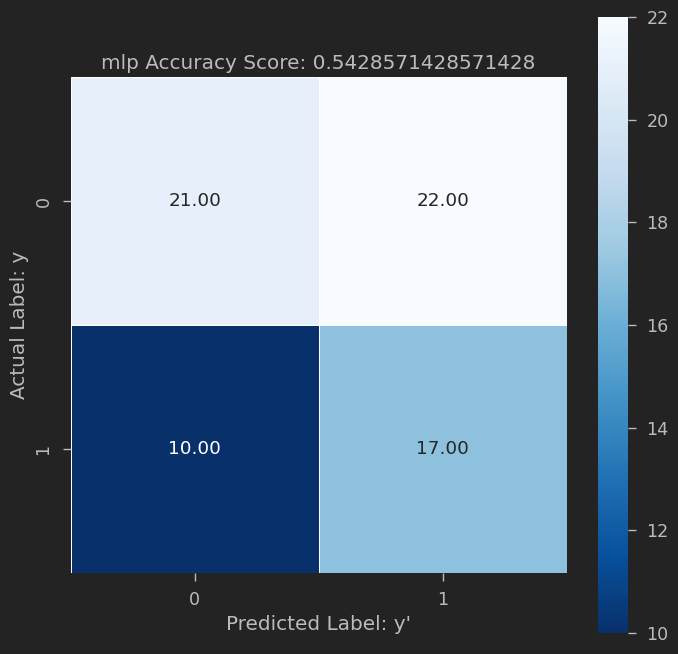

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioL','cadence','mean_speed','turning_duration', 'turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 1) X test shape:  (70, 1)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.65
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.65
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.65
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.65 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.6538461538461539
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=30,
                       random_state=50)
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train pca:  0.65384615384615

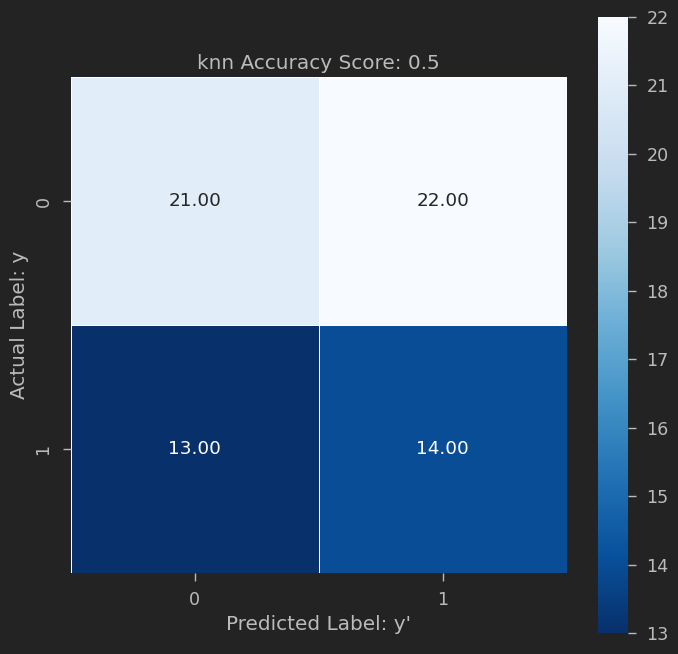




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=30,
                       random_state=50) ,  X_train ,  0.5571428571428572
              precision    recall  f1-score   support

           0     0.6875    0.5116    0.5867        43
           1     0.4474    0.6296    0.5231        27

    accuracy                         0.5571        70
   macro avg     0.5674    0.5706    0.5549        70
weighted avg     0.5949    0.5571    0.5621        70
 



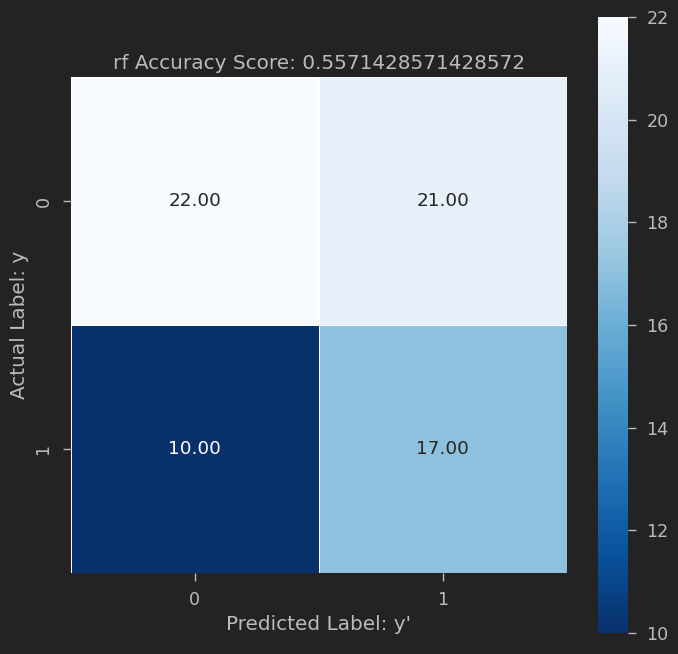




mlp :  MLPClassifier(hidden_layer_sizes=(100, 500), max_iter=100, random_state=42) ,  X_train ,  0.5428571428571428
              precision    recall  f1-score   support

           0     0.6774    0.4884    0.5676        43
           1     0.4359    0.6296    0.5152        27

    accuracy                         0.5429        70
   macro avg     0.5567    0.5590    0.5414        70
weighted avg     0.5843    0.5429    0.5473        70
 



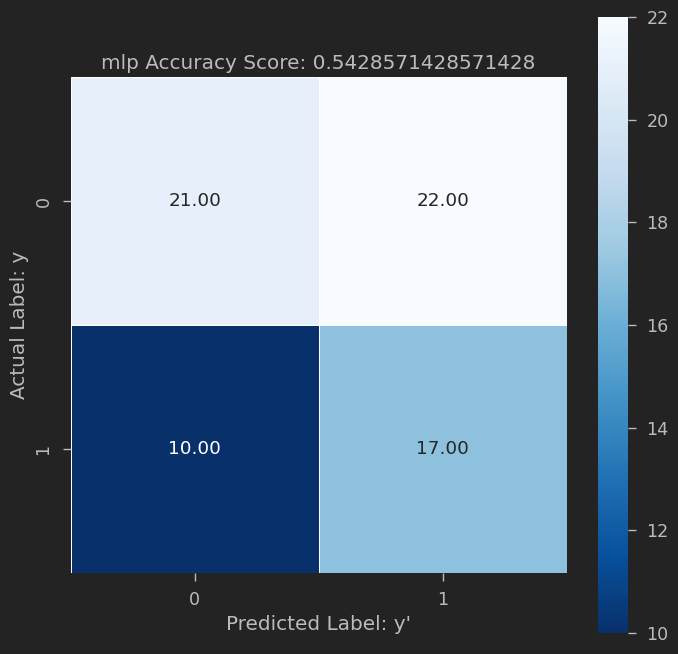

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioR','cadence','mean_speed','turning_duration', 'turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 1) X test shape:  (70, 1)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.6692307692307693
knn_best_X_Train:  KNeighborsClassifier(leaf_size=2, n_neighbors=25)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.6692307692307693
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=2, n_neighbors=25)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.6653846153846155
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=25, n_neighbors=25)
all_best:  KNeighborsClassifier(leaf_size=2, n_neighbors=25) ,  0.6692307692307693 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.676923076923077
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       r

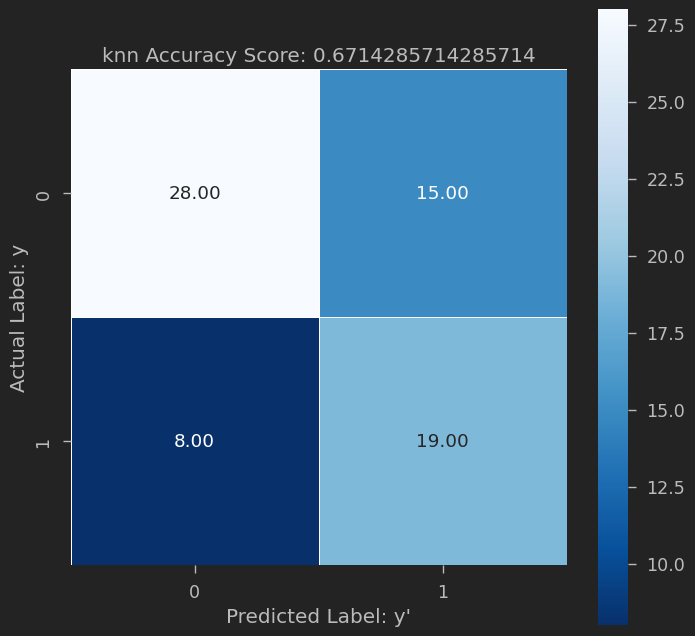




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       random_state=50) ,  X_train ,  0.6285714285714286
              precision    recall  f1-score   support

           0     0.7576    0.5814    0.6579        43
           1     0.5135    0.7037    0.5938        27

    accuracy                         0.6286        70
   macro avg     0.6355    0.6425    0.6258        70
weighted avg     0.6634    0.6286    0.6332        70
 



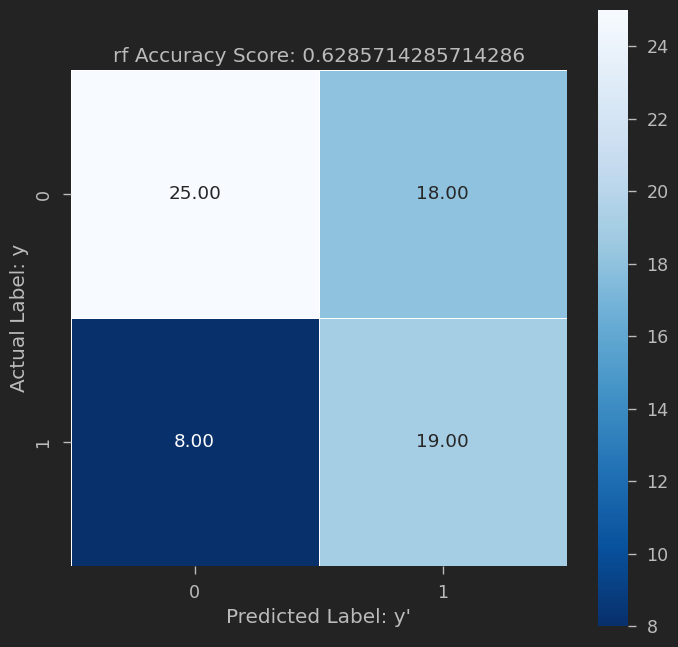




mlp :  MLPClassifier(hidden_layer_sizes=(100, 500), max_iter=100, random_state=42) ,  X_train_pca ,  0.6285714285714286
              precision    recall  f1-score   support

           0     0.7179    0.6512    0.6829        43
           1     0.5161    0.5926    0.5517        27

    accuracy                         0.6286        70
   macro avg     0.6170    0.6219    0.6173        70
weighted avg     0.6401    0.6286    0.6323        70
 



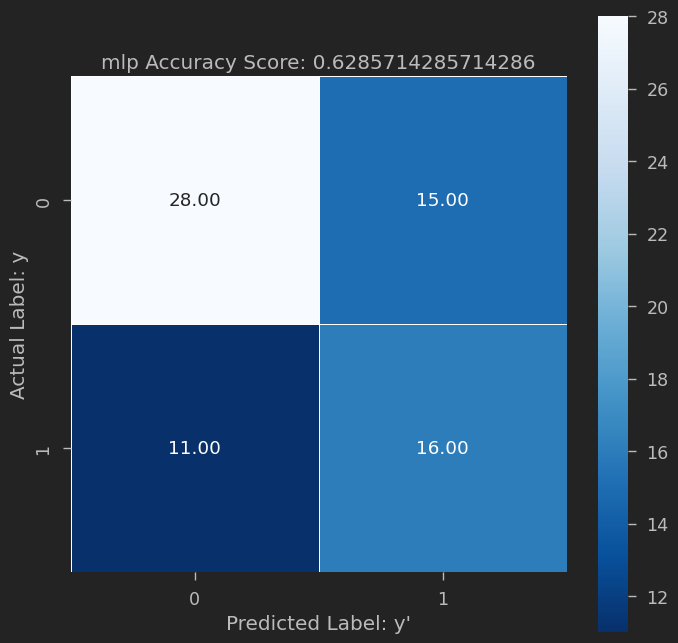

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioR','ratioL','mean_speed','turning_duration', 'turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 1) X test shape:  (70, 1)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.7653846153846153
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=30)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.7653846153846153
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1, n_neighbors=30)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.7653846153846153
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1, n_neighbors=30)
all_best:  KNeighborsClassifier(leaf_size=1, n_neighbors=30) ,  0.7653846153846153 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.7615384615384616
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=20,
                       r

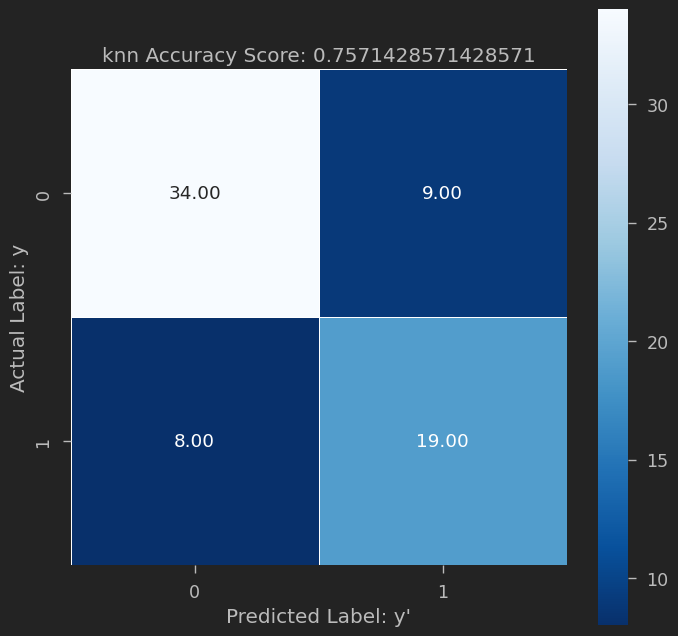




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=20,
                       random_state=10) ,  X_train ,  0.7571428571428571
              precision    recall  f1-score   support

           0     0.8095    0.7907    0.8000        43
           1     0.6786    0.7037    0.6909        27

    accuracy                         0.7571        70
   macro avg     0.7440    0.7472    0.7455        70
weighted avg     0.7590    0.7571    0.7579        70
 



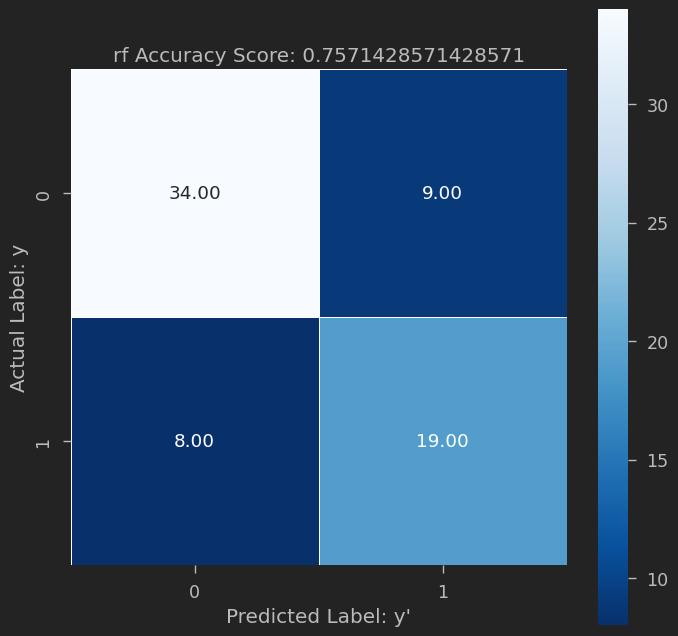




mlp :  MLPClassifier(hidden_layer_sizes=(100, 200), max_iter=100, random_state=42) ,  X_train_pca ,  0.6857142857142857
              precision    recall  f1-score   support

           0     0.8387    0.6047    0.7027        43
           1     0.5641    0.8148    0.6667        27

    accuracy                         0.6857        70
   macro avg     0.7014    0.7097    0.6847        70
weighted avg     0.7328    0.6857    0.6888        70
 



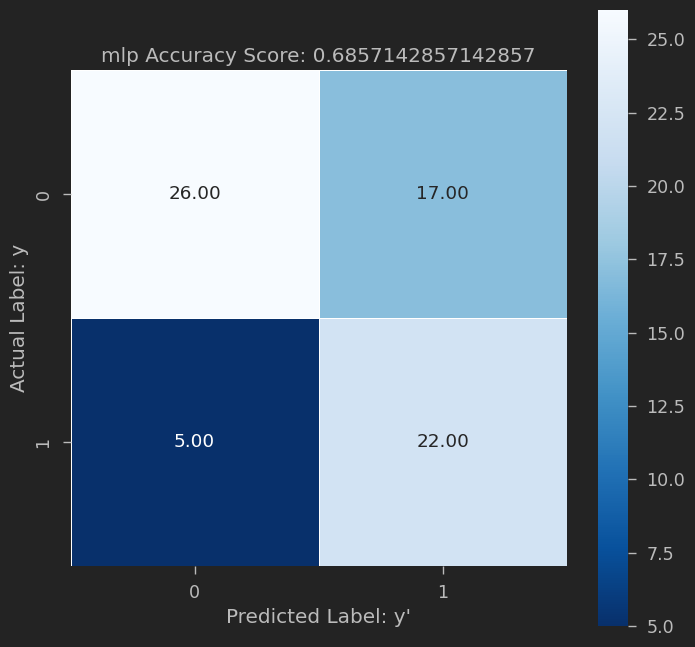

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioR','ratioL','cadence','turning_duration','turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 1) X test shape:  (70, 1)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.7423076923076923
knn_best_X_Train:  KNeighborsClassifier(leaf_size=50, n_neighbors=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.7423076923076923
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=50, n_neighbors=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.7423076923076923
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=50, n_neighbors=1)
all_best:  KNeighborsClassifier(leaf_size=50, n_neighbors=1) ,  0.7423076923076923 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.7307692307692308
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       ra

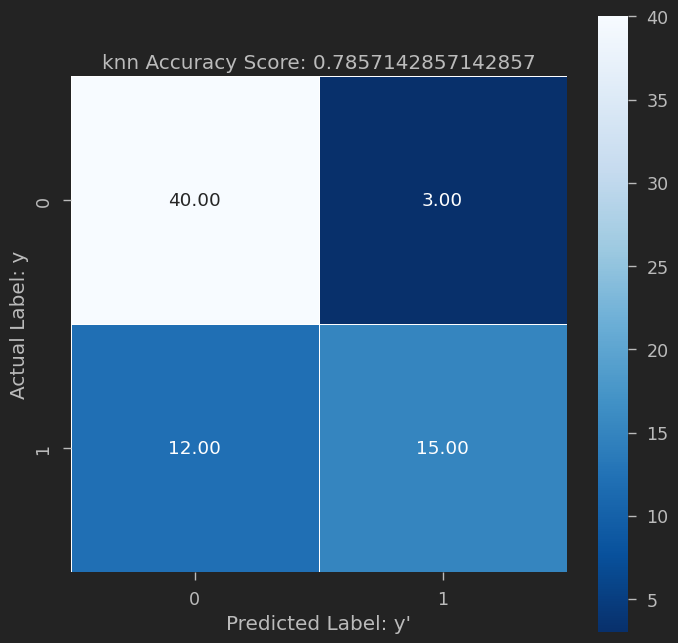




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=10) ,  X_train ,  0.8
              precision    recall  f1-score   support

           0     0.7843    0.9302    0.8511        43
           1     0.8421    0.5926    0.6957        27

    accuracy                         0.8000        70
   macro avg     0.8132    0.7614    0.7734        70
weighted avg     0.8066    0.8000    0.7911        70
 



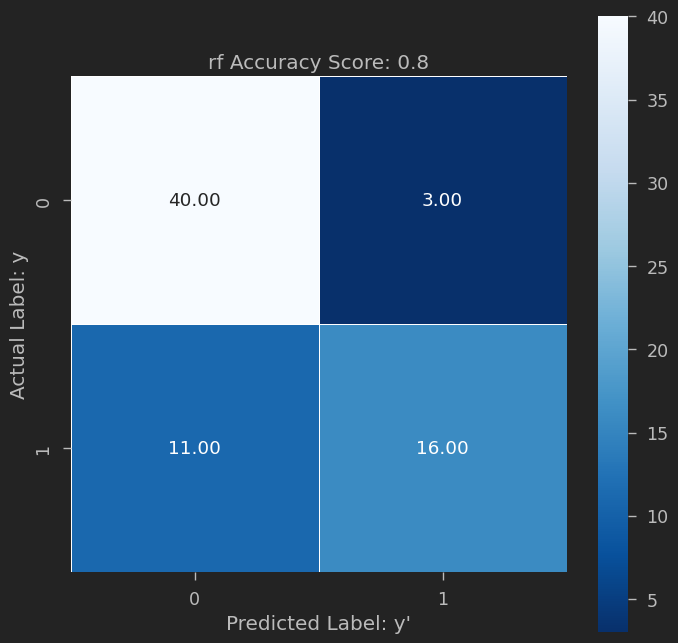




mlp :  MLPClassifier(hidden_layer_sizes=(200, 500), max_iter=100, random_state=42) ,  X_train_pca ,  0.7428571428571429
              precision    recall  f1-score   support

           0     0.7193    0.9535    0.8200        43
           1     0.8462    0.4074    0.5500        27

    accuracy                         0.7429        70
   macro avg     0.7827    0.6804    0.6850        70
weighted avg     0.7682    0.7429    0.7159        70
 



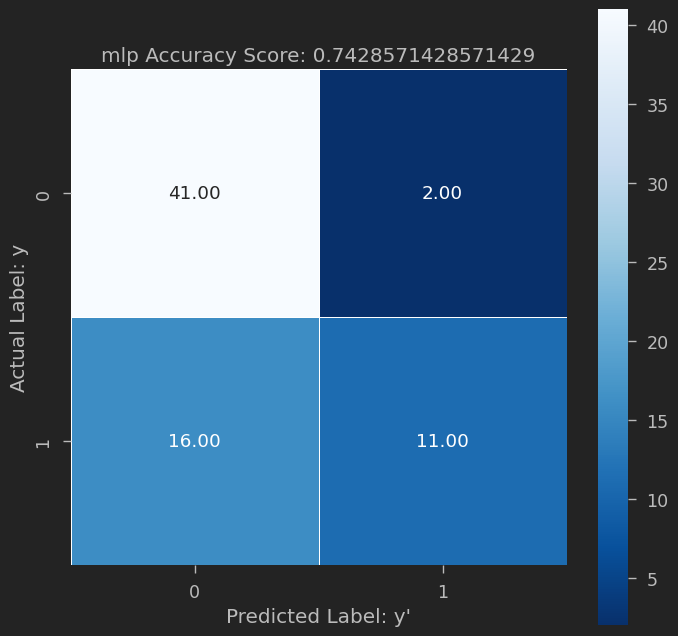

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioR','ratioL','cadence','mean_speed','turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 1) X test shape:  (70, 1)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.7153846153846155
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.7153846153846155
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.7076923076923077
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.7153846153846155 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.7153846153846155
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=10)
Fitting 4 folds for each of 162 candidates, total

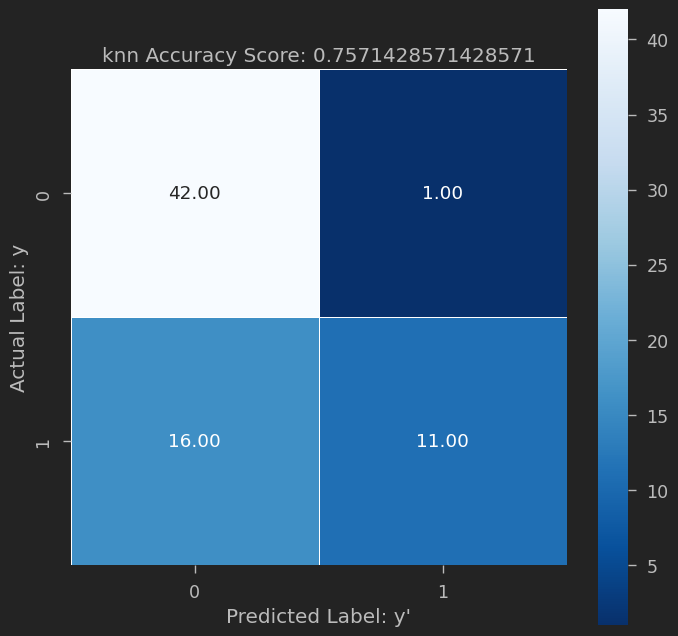




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=10) ,  X_train ,  0.7571428571428571
              precision    recall  f1-score   support

           0     0.7241    0.9767    0.8317        43
           1     0.9167    0.4074    0.5641        27

    accuracy                         0.7571        70
   macro avg     0.8204    0.6921    0.6979        70
weighted avg     0.7984    0.7571    0.7285        70
 



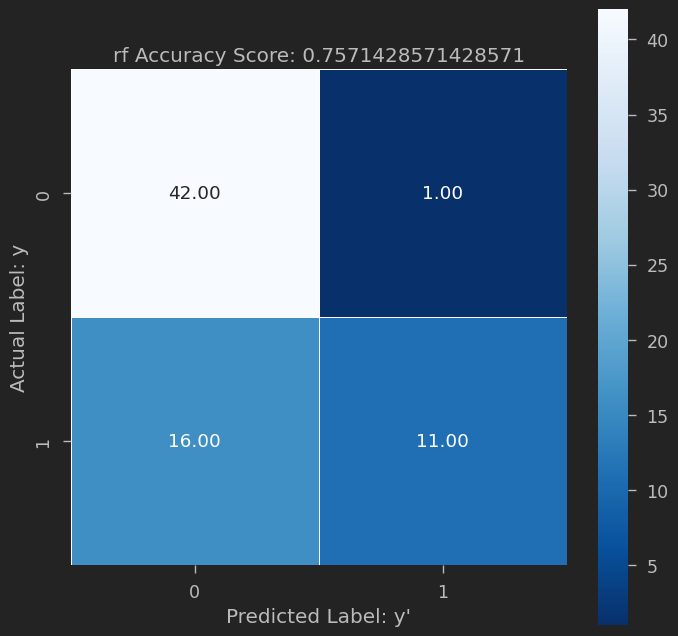




mlp :  MLPClassifier(hidden_layer_sizes=(100, 200), max_iter=100, random_state=42) ,  X_train ,  0.7571428571428571
              precision    recall  f1-score   support

           0     0.7241    0.9767    0.8317        43
           1     0.9167    0.4074    0.5641        27

    accuracy                         0.7571        70
   macro avg     0.8204    0.6921    0.6979        70
weighted avg     0.7984    0.7571    0.7285        70
 



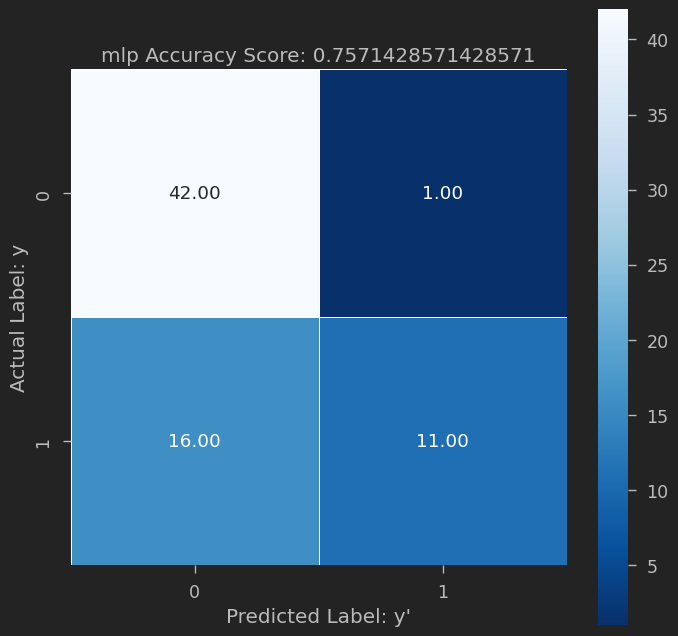

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioR','ratioL','cadence','mean_speed','turning_duration'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 4) X test shape:  (70, 4)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.75
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=10)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.7923076923076924
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1, n_neighbors=10)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.8
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1, n_neighbors=10)
all_best:  KNeighborsClassifier(leaf_size=1, n_neighbors=10) ,  0.8 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.8307692307692307
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=50)
Fitting 4 folds for each of 1

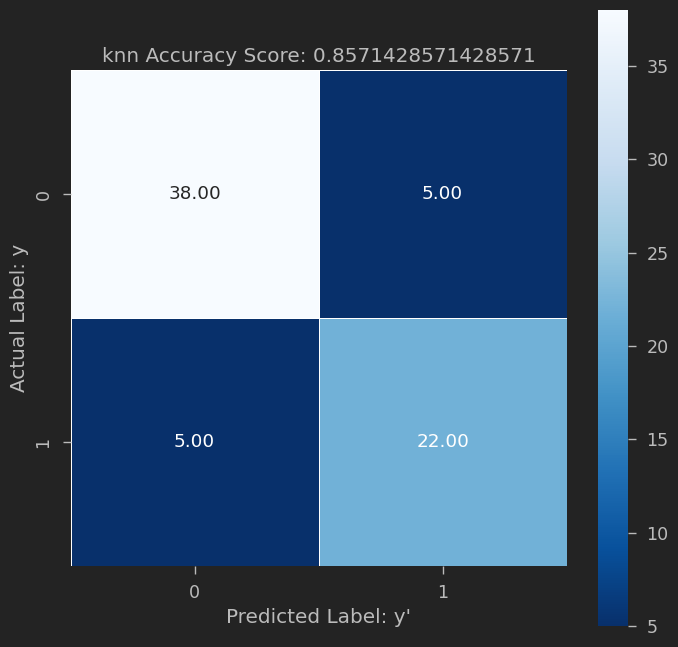




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=50) ,  X_train ,  0.8285714285714286
              precision    recall  f1-score   support

           0     0.8974    0.8140    0.8537        43
           1     0.7419    0.8519    0.7931        27

    accuracy                         0.8286        70
   macro avg     0.8197    0.8329    0.8234        70
weighted avg     0.8375    0.8286    0.8303        70
 



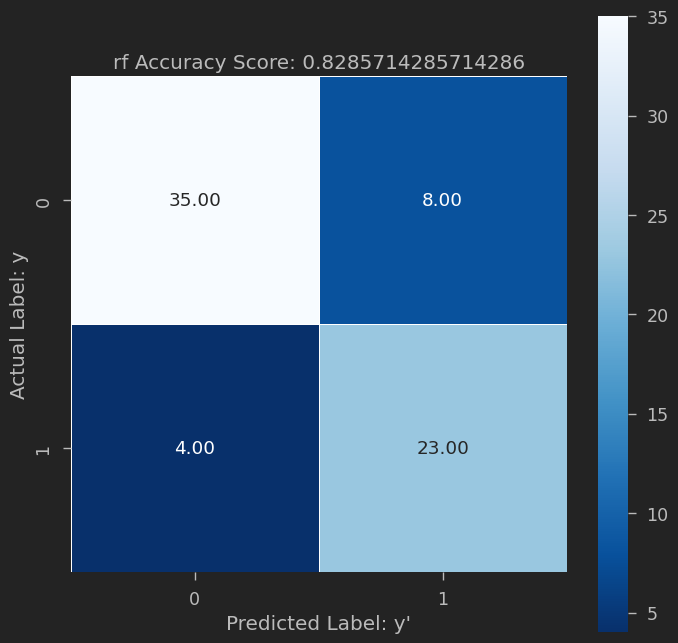




mlp :  MLPClassifier(hidden_layer_sizes=(200, 500), max_iter=500, random_state=42) ,  X_train_scaler ,  0.8285714285714286
              precision    recall  f1-score   support

           0     0.8780    0.8372    0.8571        43
           1     0.7586    0.8148    0.7857        27

    accuracy                         0.8286        70
   macro avg     0.8183    0.8260    0.8214        70
weighted avg     0.8320    0.8286    0.8296        70
 



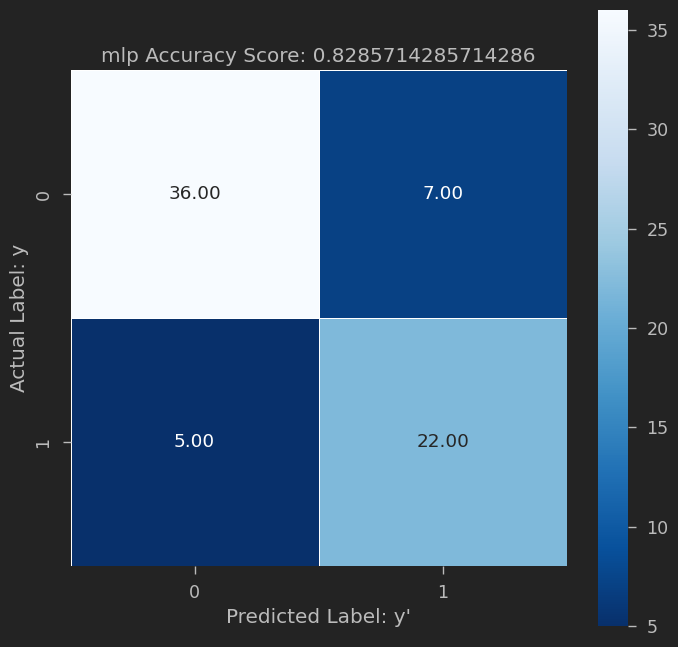

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['ratioR','ratioL'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 2) X test shape:  (70, 2)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.65
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.6615384615384615
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.65
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.6615384615384615 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.6538461538461539
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       random_state=10)
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X 

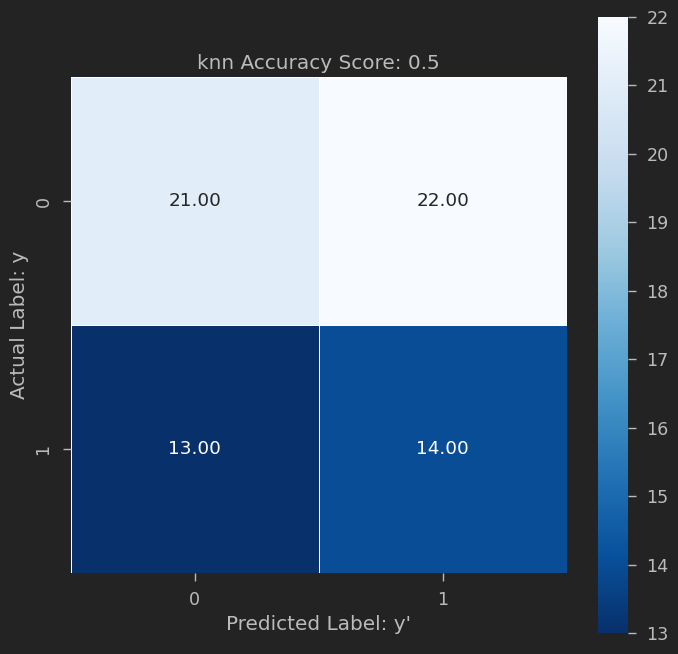




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       random_state=10) ,  X_train ,  0.5428571428571428
              precision    recall  f1-score   support

           0     0.6774    0.4884    0.5676        43
           1     0.4359    0.6296    0.5152        27

    accuracy                         0.5429        70
   macro avg     0.5567    0.5590    0.5414        70
weighted avg     0.5843    0.5429    0.5473        70
 



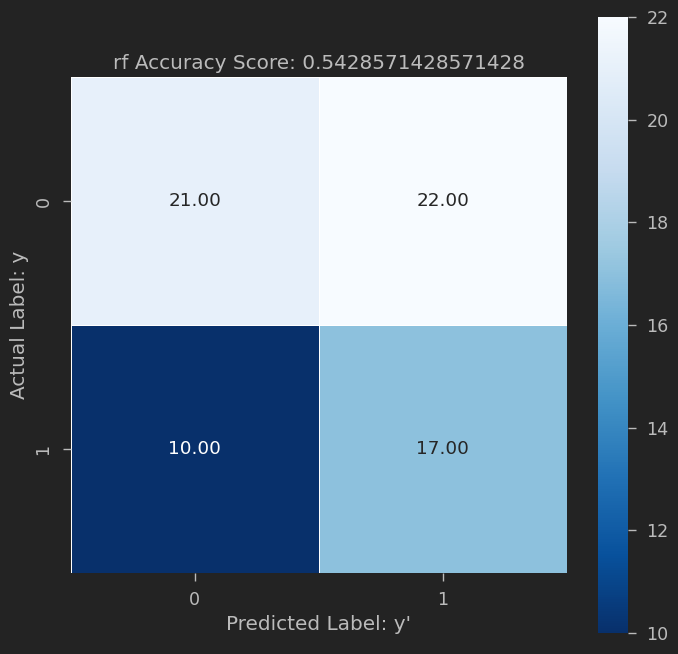




mlp :  MLPClassifier(hidden_layer_sizes=(100, 200), max_iter=100, random_state=42) ,  X_train ,  0.5285714285714286
              precision    recall  f1-score   support

           0     0.7273    0.3721    0.4923        43
           1     0.4375    0.7778    0.5600        27

    accuracy                         0.5286        70
   macro avg     0.5824    0.5749    0.5262        70
weighted avg     0.6155    0.5286    0.5184        70
 



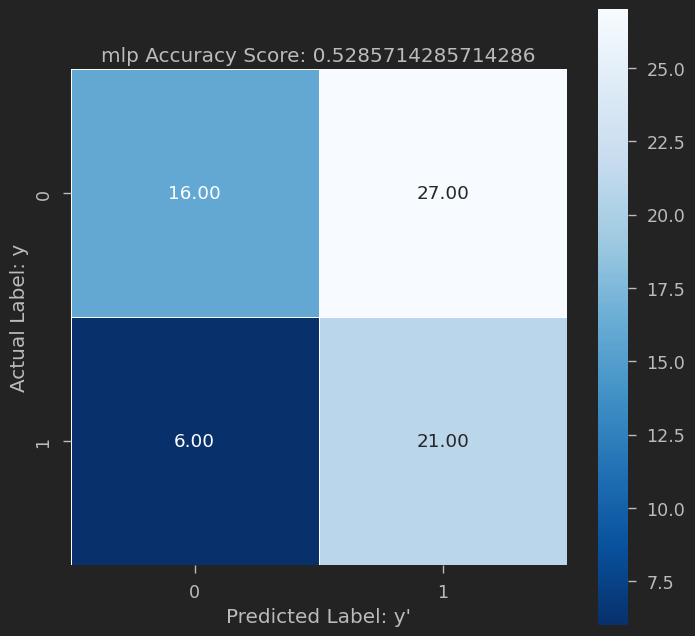

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['cadence','mean_speed','turning_duration', 'turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 3) X test shape:  (70, 3)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.6653846153846154
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=30)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.6807692307692308
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.6923076923076923
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1, n_neighbors=10)
all_best:  KNeighborsClassifier(leaf_size=1, n_neighbors=10) ,  0.6923076923076923 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.6884615384615386
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=50)
F

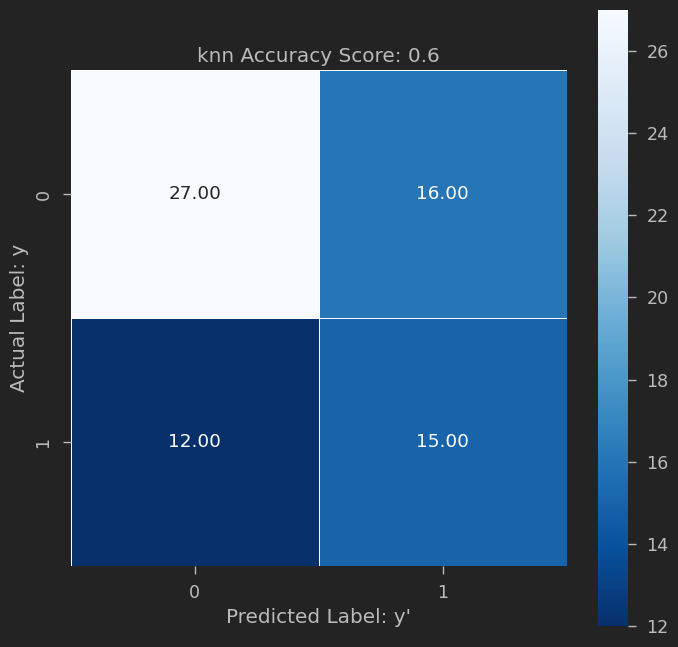




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=20,
                       random_state=50) ,  X_train_pca ,  0.6714285714285714
              precision    recall  f1-score   support

           0     0.7632    0.6744    0.7160        43
           1     0.5625    0.6667    0.6102        27

    accuracy                         0.6714        70
   macro avg     0.6628    0.6705    0.6631        70
weighted avg     0.6858    0.6714    0.6752        70
 



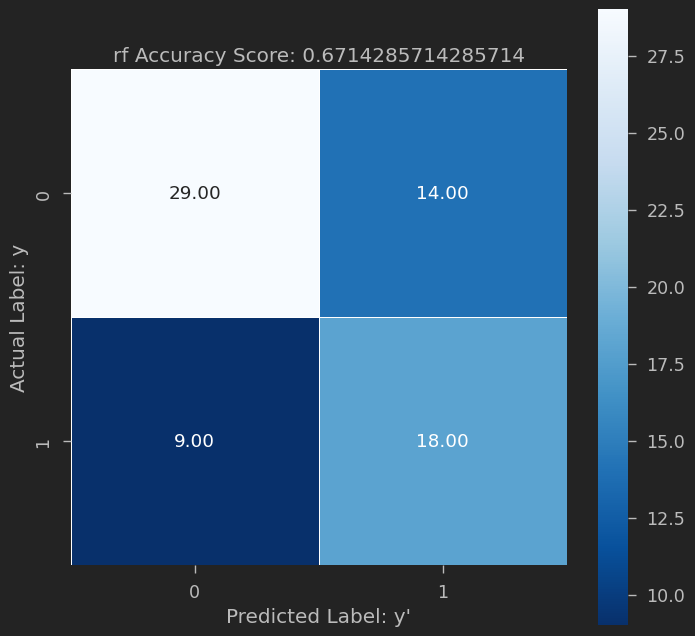




mlp :  MLPClassifier(hidden_layer_sizes=(100, 200), max_iter=100, random_state=42) ,  X_train_scaler ,  0.6714285714285714
              precision    recall  f1-score   support

           0     0.8125    0.6047    0.6933        43
           1     0.5526    0.7778    0.6462        27

    accuracy                         0.6714        70
   macro avg     0.6826    0.6912    0.6697        70
weighted avg     0.7123    0.6714    0.6751        70
 



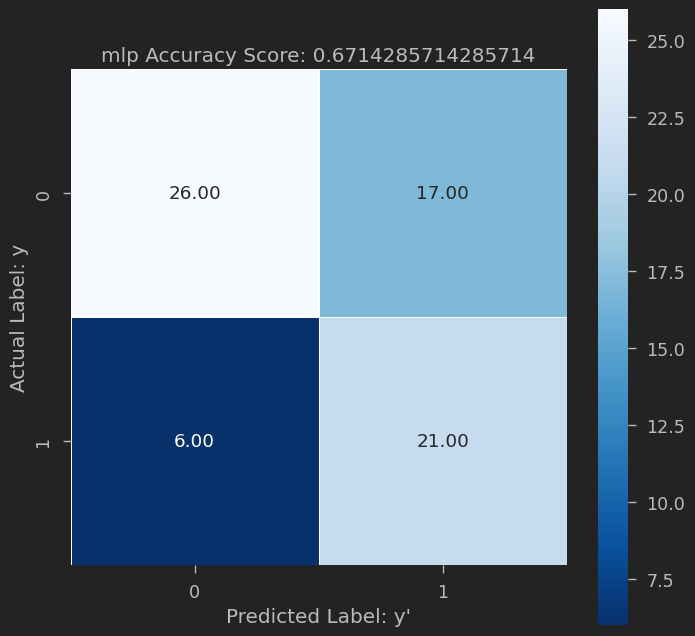

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['mean_speed','turning_duration', 'turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 4) X test shape:  (70, 4)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.6653846153846154
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=30)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.7615384615384615
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.7730769230769231
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.7730769230769231 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.7923076923076924
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=50)
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score

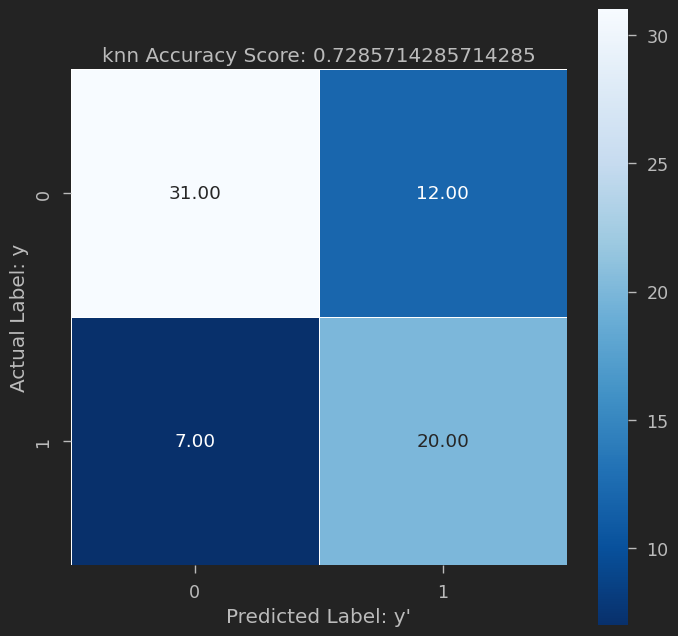




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       random_state=10) ,  X_train_pca ,  0.7285714285714285
              precision    recall  f1-score   support

           0     0.8000    0.7442    0.7711        43
           1     0.6333    0.7037    0.6667        27

    accuracy                         0.7286        70
   macro avg     0.7167    0.7239    0.7189        70
weighted avg     0.7357    0.7286    0.7308        70
 



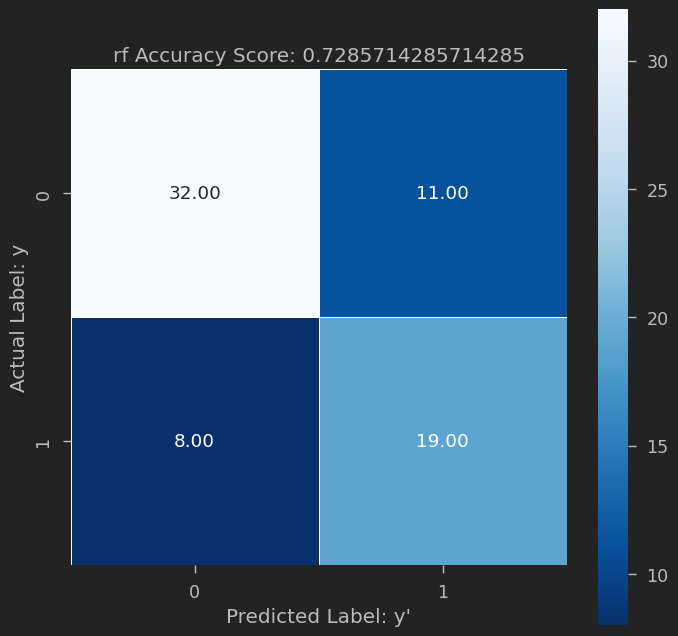




mlp :  MLPClassifier(hidden_layer_sizes=(100, 500), max_iter=100, random_state=42) ,  X_train_scaler ,  0.8
              precision    recall  f1-score   support

           0     0.8919    0.7674    0.8250        43
           1     0.6970    0.8519    0.7667        27

    accuracy                         0.8000        70
   macro avg     0.7944    0.8096    0.7958        70
weighted avg     0.8167    0.8000    0.8025        70
 



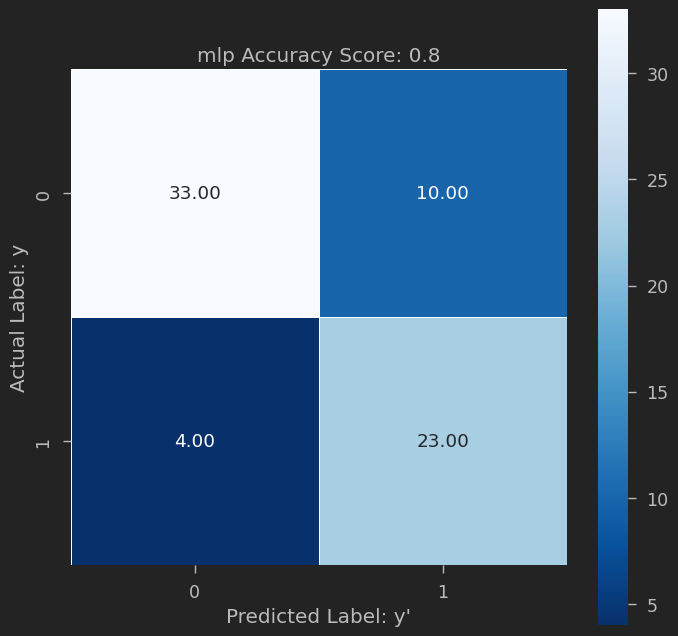

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['turning_duration', 'turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 5) X test shape:  (70, 5)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.7038461538461538
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=25)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.7884615384615384
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.7807692307692308
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.7884615384615384 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.8500000000000001
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=10)
Fitting 4 folds for each of 162 c

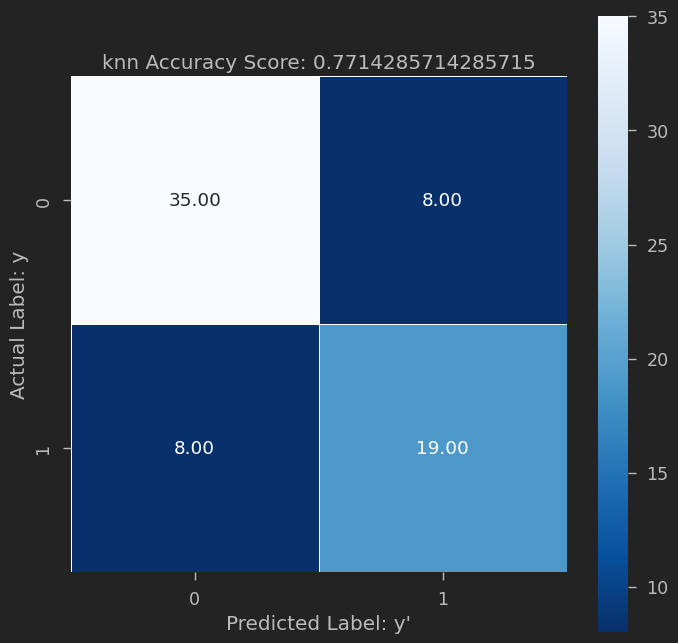




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=10) ,  X_train ,  0.8571428571428571
              precision    recall  f1-score   support

           0     0.9231    0.8372    0.8780        43
           1     0.7742    0.8889    0.8276        27

    accuracy                         0.8571        70
   macro avg     0.8486    0.8630    0.8528        70
weighted avg     0.8657    0.8571    0.8586        70
 



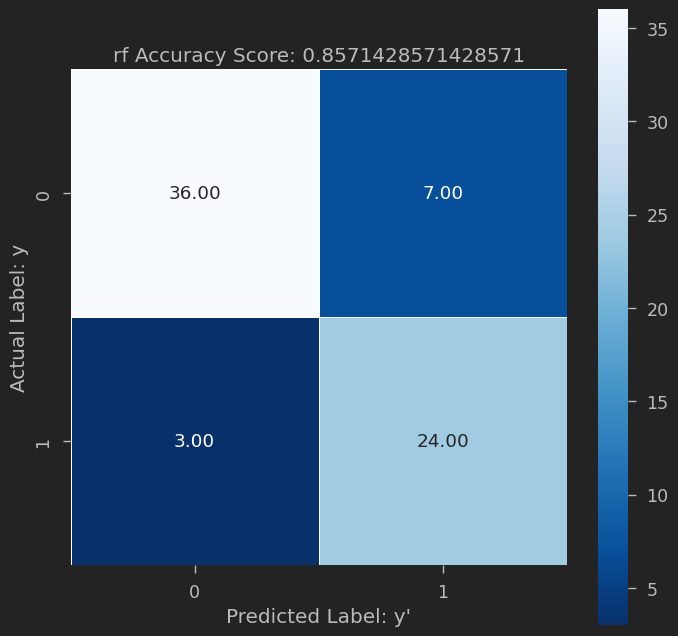




mlp :  MLPClassifier(hidden_layer_sizes=(200, 500), max_iter=100, random_state=42) ,  X_train_scaler ,  0.8
              precision    recall  f1-score   support

           0     0.9143    0.7442    0.8205        43
           1     0.6857    0.8889    0.7742        27

    accuracy                         0.8000        70
   macro avg     0.8000    0.8165    0.7974        70
weighted avg     0.8261    0.8000    0.8026        70
 



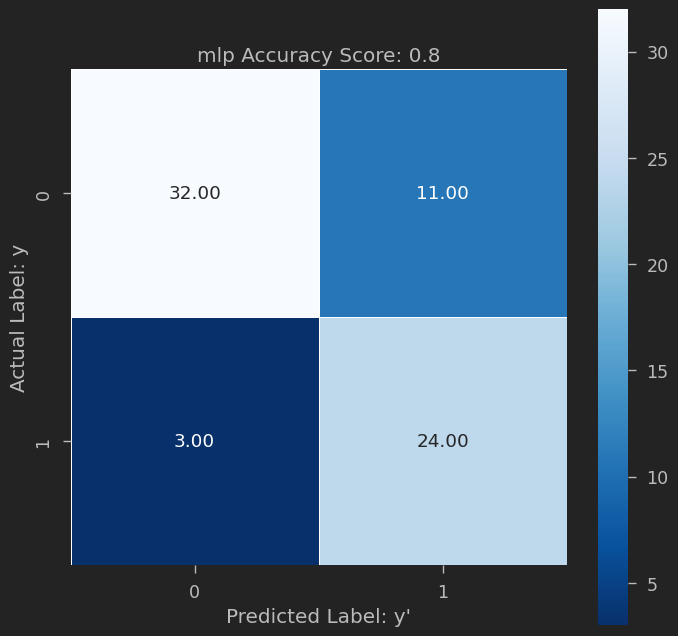

In [ ]:
# names=['ratioR','ratioL','cadence','mean_speed','turning_duration', 'turning_steps','parkinson']
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(columns=['turning_steps'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)

The test size is:  0.21 ,  48 ,  True
X train shape:  (260, 5) X test shape:  (70, 5)
y train shape:  (260,) y test shape:  (70,)
PCA...
Scaler...
knn...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train:  0.8038461538461539
knn_best_X_Train:  KNeighborsClassifier(leaf_size=1, n_neighbors=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train pca:  0.8115384615384617
knn_best_X_Train_pca:  KNeighborsClassifier(leaf_size=1)
Fitting 4 folds for each of 54 candidates, totalling 216 fits
best score X Train scaler:  0.8230769230769232
knn_best_X_Train_scaler:  KNeighborsClassifier(leaf_size=1)
all_best:  KNeighborsClassifier(leaf_size=1) ,  0.8230769230769232 

rf...
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score X Train:  0.8538461538461539
rf_best_X_Train:  RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=50)
Fitting 4 folds for each of 162 candidates, totalling 648 fits
best score 

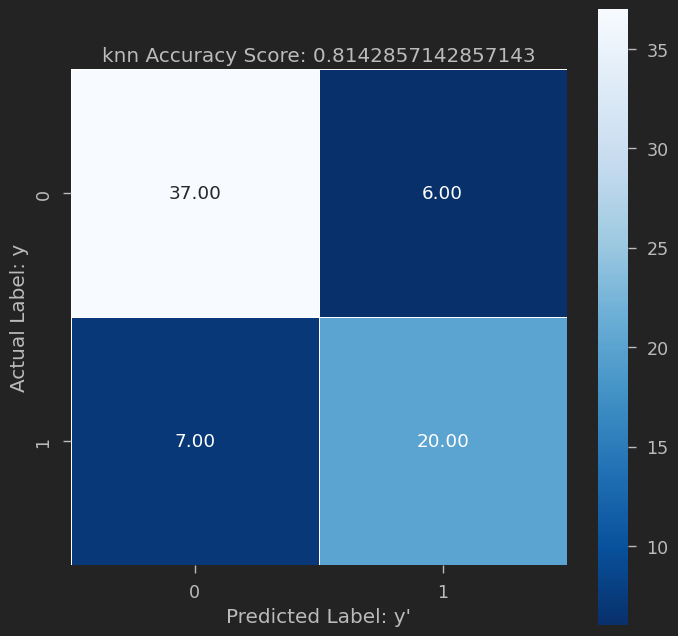




rf :  RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=50) ,  X_train ,  0.8857142857142857
              precision    recall  f1-score   support

           0     0.9487    0.8605    0.9024        43
           1     0.8065    0.9259    0.8621        27

    accuracy                         0.8857        70
   macro avg     0.8776    0.8932    0.8823        70
weighted avg     0.8938    0.8857    0.8869        70
 



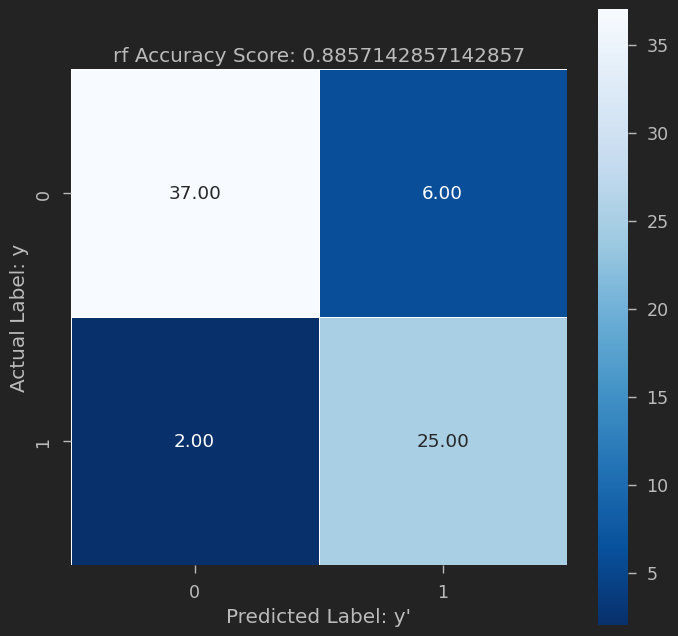




mlp :  MLPClassifier(hidden_layer_sizes=(200, 500), max_iter=500, random_state=42) ,  X_train_scaler ,  0.8571428571428571
              precision    recall  f1-score   support

           0     0.9231    0.8372    0.8780        43
           1     0.7742    0.8889    0.8276        27

    accuracy                         0.8571        70
   macro avg     0.8486    0.8630    0.8528        70
weighted avg     0.8657    0.8571    0.8586        70
 



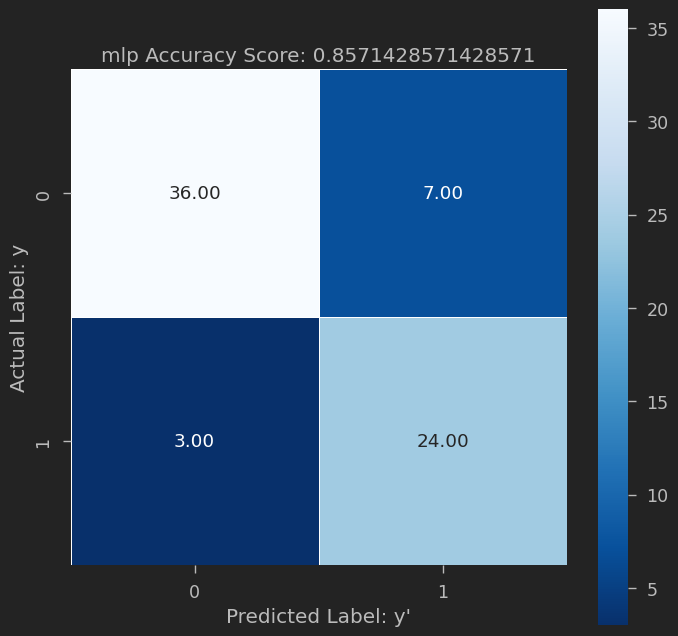

In [ ]:
X = df.drop(columns=['parkinson'],axis=1)
y = df['parkinson']

X.drop(['cadence'],axis=1,inplace=True)

algos = []
best_train_names = []
best_trains = []
best_train_tests = []
best_estimators = []

y_train, y_test = run(X, y)
show_result(y_train, y_test)